# Autoencoders

Источник: keras blog

In [17]:
import keras
from keras import layers
from keras import backend as K
import matplotlib.pyplot as plt

encoding_dim = 2        # set the desired dimensionality of the encoded representation.
input_img = keras.Input(shape=(784,))    # expects inputs of size 784.                   

encoded1 = layers.Dense(64, activation='relu')(input_img)  #  a dense layer with 64 units and ReLU activation applied to the input_img.     
encoded2 = layers.Dense(encoding_dim, activation='relu')(encoded1) # another dense layer with encoding_dim units and ReLU activation applied to encoded1.
# a Keras SEPARATE model with input_img as the input and encoded2 as the output.   
encoder = keras.Model(input_img, encoded2)           

decoded2 = layers.Dense(64, activation='relu')(encoded2)    #  a dense layer with 64 units and ReLU activation applied to the encoded representation (encoded2).
decoded = layers.Dense(784, activation='sigmoid')(decoded2) # a dense layer with 784 units and sigmoid activation.
# a Keras model with input_img as the input and decoded as the output.
autoencoder = keras.Model(input_img, decoded)        

# Defining the decoder as a SEPARATE model:
encoded_input = keras.Input(shape=(encoding_dim,))              

decoder_layer2 = autoencoder.layers[-2] # retrieve the second-to-last layer of the autoencoder model.
decoder_layer1 = autoencoder.layers[-1] # retrieve the last layer of the autoencoder model.

# a Keras model that takes encoded_input as input and will output what the decoder_layer2 and decoder_layer1 applied to encoded_input.
decoder = keras.Model(encoded_input, decoder_layer1(decoder_layer2(encoded_input)))

In [18]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
 dense_14 (Dense)            (None, 64)                192       
                                                                 
 dense_15 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,522
Trainable params: 101,522
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
# we do not need the labels, so we will only load the images.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
# Normalizing all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# reshape the images from (28, 28) to (784,) because our autoencoder will take input vectors, not 2D matrices.
# start from the index 1 to exclude the batch dimension (we multiply the dimensions of all axes except the first axis)
x_train = x_train.reshape( (len(x_train), np.prod(x_train.shape[1:]) ))
# or use -1 to automatically infer the dimension from the other axes.
x_test = x_test.reshape((len(x_test), -1 ))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Epoch 1/50
59/59 - 2s - loss: 0.1163 - val_loss: 0.0706 - 2s/epoch - 28ms/step
Epoch 2/50
59/59 - 1s - loss: 0.0674 - val_loss: 0.0644 - 704ms/epoch - 12ms/step
Epoch 3/50
59/59 - 1s - loss: 0.0631 - val_loss: 0.0614 - 726ms/epoch - 12ms/step
Epoch 4/50
59/59 - 1s - loss: 0.0605 - val_loss: 0.0595 - 526ms/epoch - 9ms/step
Epoch 5/50
59/59 - 0s - loss: 0.0591 - val_loss: 0.0584 - 415ms/epoch - 7ms/step
Epoch 6/50
59/59 - 0s - loss: 0.0581 - val_loss: 0.0575 - 425ms/epoch - 7ms/step
Epoch 7/50
59/59 - 0s - loss: 0.0573 - val_loss: 0.0567 - 416ms/epoch - 7ms/step
Epoch 8/50
59/59 - 0s - loss: 0.0565 - val_loss: 0.0560 - 414ms/epoch - 7ms/step
Epoch 9/50
59/59 - 0s - loss: 0.0558 - val_loss: 0.0553 - 418ms/epoch - 7ms/step
Epoch 10/50
59/59 - 0s - loss: 0.0552 - val_loss: 0.0547 - 417ms/epoch - 7ms/step
Epoch 11/50
59/59 - 0s - loss: 0.0546 - val_loss: 0.0542 - 417ms/epoch - 7ms/step
Epoch 12/50
59/59 - 0s - loss: 0.0541 - val_loss: 0.0538 - 415ms/epoch - 7ms/step
Epoch 13/50
59/59 - 0s - 

In [22]:
encoded_imgs = encoder.predict(x_test)         # encode x_test to get the encoded representations wihch are 2D vectors.
print(encoded_imgs.shape)
print(encoded_imgs[:3])     # first 3 encoded vectors
print(encoded_imgs[-1])     # last encoded vector
decoded_imgs = decoder.predict(encoded_imgs)   # decode the encoded representations back to the original 784-dimensional vectors.
print(decoded_imgs.shape)   
print(decoded_imgs[:3])     # first 3 decoded vectors

313/313 [==============================] - 0s 716us/step
(10000, 2)
[[40.643494  38.705734 ]
 [22.862505  11.203364 ]
 [ 3.7401485 48.99853  ]]
[33.75187   10.8239565]
313/313 [==============================] - 0s 783us/step
(10000, 784)
[[4.3927806e-13 3.8687651e-12 2.0560569e-13 ... 3.7159295e-13
  2.6362501e-13 8.1796034e-13]
 [1.3240411e-07 2.4723039e-07 1.3188225e-07 ... 1.8327279e-07
  1.3250794e-07 1.4211214e-07]
 [2.3650732e-12 3.0334043e-12 1.5162733e-12 ... 4.1477203e-13
  1.8594004e-12 1.7526555e-12]]


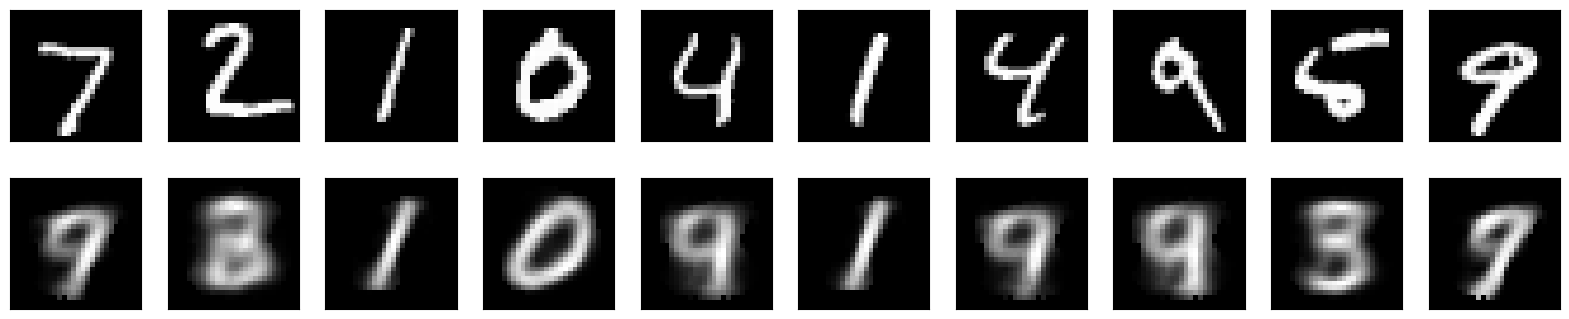

In [23]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 18ms/step


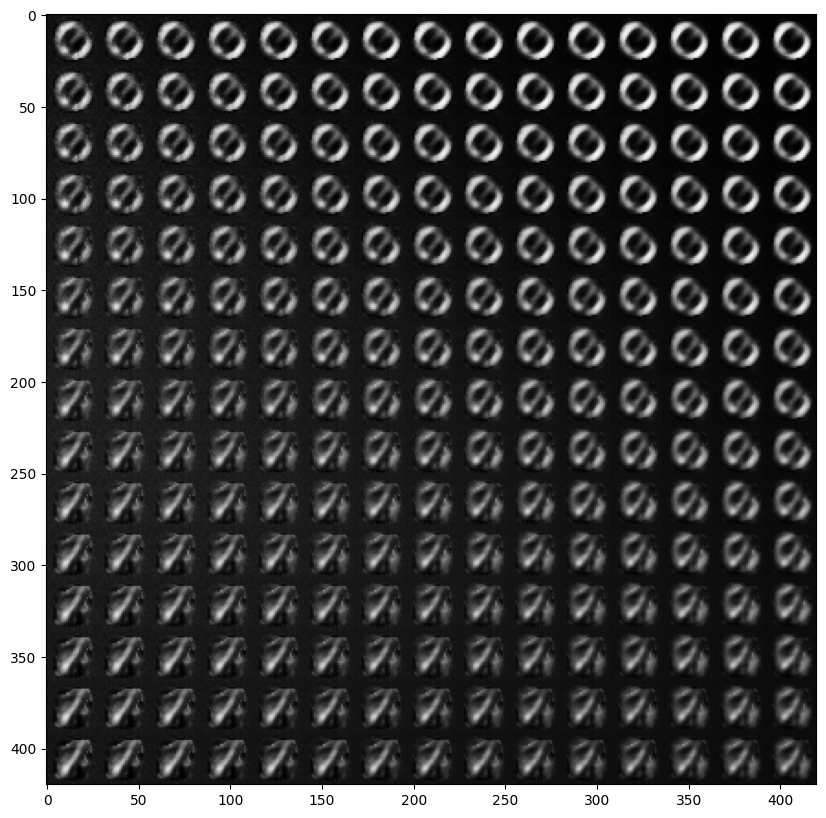

In [24]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# Variational autoencoder

In [48]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(784,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(2)(h)
z_log_sigma = layers.Dense(2)(h)


In [57]:
print(z_mean)
print(z_log_sigma)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_28/BiasAdd:0', description="created by layer 'dense_28'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_29/BiasAdd:0', description="created by layer 'dense_29'")


In [49]:
# N(mu, sigma) ---> mu + eps*sigma, eps=N(0,1)

In [50]:
def sampling(args):
    z_mean, z_log_sigma = args
    # returns a random tensor with the same shape as z_mean, sampled from a unit Gaussian.
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1) 
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [51]:
# Create encoder
vae_encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='vae_encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
vae_decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = vae_decoder(vae_encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [52]:
# reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
# KerasTensor
reconstruction_loss = keras.losses.mean_squared_error(inputs, outputs) # MSE between the input data inputs and the output data outputs. This measures the discrepancy between the reconstructed output and the original input.
reconstruction_loss *= original_dim # This scaling factor helps account for differences in the magnitude of the loss based on the input dimensionality.
# KL divergence loss
# KL divergence, short for Kullback-Leibler divergence, is a measure of how one probability distribution differs from another
# KerasTensor
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)   # KL divergence between the learned distribution of the latent variable z and a prior distribution (usually a standard normal distribution).
kl_loss = K.sum(kl_loss, axis=-1)  # The KL loss is summed along the last axis (axis=-1). This is often used when dealing with batches of data, as it aggregates the loss across all samples in the batch.         
kl_loss *= -0.5                     # The KL loss is multiplied by -0.5, which is a constant used to adjust the scale of the loss.
vae_loss = K.mean(reconstruction_loss + kl_loss)# The VAE loss is computed as the mean of the sum of the reconstruction loss and the KL loss. This combination balances the reconstruction fidelity and the regularization effect enforced by the KL divergence.
vae.add_loss(vae_loss)  # The VAE loss is added to the VAE model as an additional loss term. This ensures that both the reconstruction loss and the KL loss are taken into account during training.
vae.compile(optimizer='adam') # The VAE model is compiled using the Adam optimizer. This step finalizes the model's configuration before training begins.
print(kl_loss)
print(reconstruction_loss)
print(vae_loss.shape)
vae.summary()

KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.multiply_17/Mul:0', description="created by layer 'tf.math.multiply_17'")
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.multiply_16/Mul:0', description="created by layer 'tf.math.multiply_16'")
()
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 vae_encoder (Functional)       [(None, 2),          50500       ['input_10[0][0]']               
                                 (None, 2),                                                       
                                 (None, 2)]           

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

hist = vae.fit(x_train, x_train,
        epochs=50,
        batch_size=128,
        validation_data=(x_test, x_test),
        workers=-1,
        shuffle=True)

Epoch 1/50
469/469 [==============================] - 3s 4ms/step - loss: 60.8164 - val_loss: 46.4473
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 43.3516 - val_loss: 41.1792
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 40.6679 - val_loss: 39.8202
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 39.7729 - val_loss: 39.2379
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 39.2539 - val_loss: 38.8990
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 38.8793 - val_loss: 38.5494
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 38.5700 - val_loss: 38.3254
Epoch 8/50
469/469 [==============================] - 2s 3ms/step - loss: 38.3024 - val_loss: 38.0507
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 38.0648 - val_loss: 37.8674
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 37.8420

313/313 [==============================] - 0s 975us/step


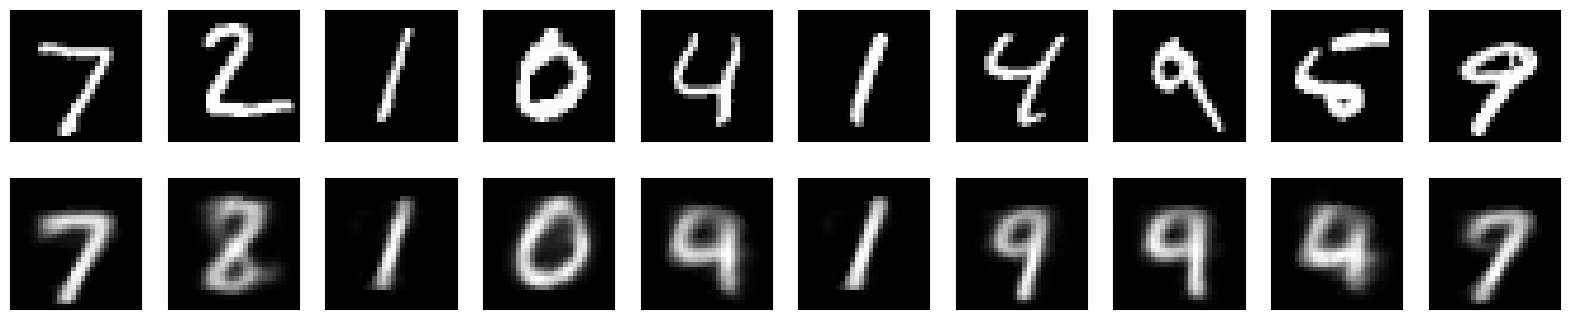

In [54]:
vae_encoded_imgs = vae_encoder.predict(x_test)
decoded_imgs = vae_decoder.predict(vae_encoded_imgs[2])

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 18ms/step


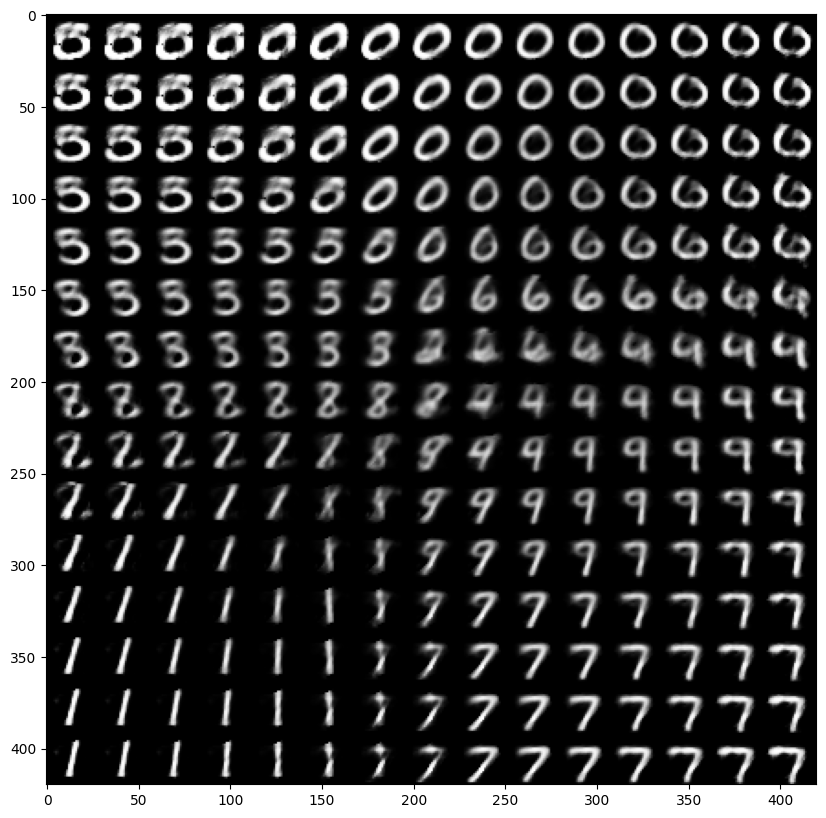

In [55]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae_decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()